This is capston project for my udacity ML nanodegree project

You can find the data information from [kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) and more detailed from [here](https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt). The data contains 23 nominal, 23 ordinal, 14 discrete, 20 continuous variables and one target variable. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
# check the dimension
print(train.shape)

(1460, 81)


In [5]:
test = pd.read_csv('test.csv')
print(test.shape)

(1459, 80)


In [6]:
data = pd.concat([train.iloc[:,0:-1], test], axis=0,ignore_index=True)
data.shape

(2919, 80)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 2918
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

In [8]:
# check the statistical summary of numerical data
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


## Check Missing Values

In [9]:
# check the missing values in each feature
s = data.apply(lambda x: sum(x.isnull()), axis=0)
miss = s[s>0]

In [10]:
miss

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

In [11]:
miss_less_4 = s[(s<=4)&(s>0)]
miss_less_4

MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
Electrical      1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
GarageCars      1
GarageArea      1
SaleType        1
dtype: int64

In [12]:
idx_del = []

for idx in data.index:
    if data.iloc[idx][miss_less_4.index].isnull().any():
        idx_del.append(idx)
        
idx_del  

[1379, 1555, 1915, 1945, 2120, 2151, 2188, 2216, 2250, 2473, 2489, 2576, 2904]

### There are 16 features contain missing values in less than 4 observations. These missing values spread in 13 observations and 12 of them are from testing dataset. Eight of them (BasmtFinSF1, BssmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath, GarageCars, GarageArea) are numerical variables

In [13]:
data.iloc[idx_del,]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,NaN,754,640,0,1394,0.0,0.0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal
1555,1556,50,RL,72.0,10632,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,5,3,1917,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,Fa,No,Unf,0.0,Unf,0.0,689.0,689.0,GasA,Gd,N,SBrkr,725,499,0,1224,0.0,0.0,1,1,3,1,NaN,6,Mod,0,NaN,Detchd,1917.0,Unf,1.0,180.0,Fa,Fa,N,0,0,248,0,0,0,NaN,NaN,NaN,0,1,2010,COD,Normal
1915,1916,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,NaN,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal
1945,1946,20,RL,NaN,31220,Pave,NaN,IR1,Bnk,NaN,FR2,Gtl,Gilbert,Feedr,Norm,1Fam,1Story,6,2,1952,1952,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1632.0,1632.0,GasA,TA,Y,FuseA,1474,0,0,1474,0.0,0.0,1,0,3,1,TA,7,Min2,2,Gd,Attchd,1952.0,Unf,2.0,495.0,TA,TA,Y,0,0,144,0,0,0,NaN,NaN,Shed,750,5,2008,WD,Normal
2120,2121,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml
2151,2152,30,RL,85.0,19550,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,2007,Flat,Tar&Grv,NaN,NaN,None,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,Fa,5,Typ,2,Gd,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,39,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
2188,2189,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
2216,2217,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,NaN,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml
2250,2251,70,NaN,NaN,56600,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,TA,7,Maj1,0,NaN,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
2473,2474,50,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,4,1,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,C

In [14]:
miss_more_4 = s[(s>4)]
miss_more_4

LotFrontage      486
Alley           2721
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
dtype: int64

### There are 18 featuress have more than 4 observations have missing values. Three of them (LotFrontage, MasVnrArea, and GarageYrBlt) are continuous variables.

## Check unique values for each categorical feature

In [15]:
categorical_cols = []
for col, col_data in data.iteritems():
    if col_data.dtype == object:
        categorical_cols.append(col) 
        
for col in miss.index:
    if col in categorical_cols:
        print(col, data[col].unique())

('MSZoning', array(['RL', 'RM', 'C (all)', 'FV', 'RH', nan], dtype=object))
('Alley', array([nan, 'Grvl', 'Pave'], dtype=object))
('Utilities', array(['AllPub', 'NoSeWa', nan], dtype=object))
('Exterior1st', array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock', nan], dtype=object))
('Exterior2nd', array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock', nan], dtype=object))
('MasVnrType', array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object))
('BsmtQual', array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object))
('BsmtCond', array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object))
('BsmtExposure', array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object))
('BsmtFinType1', array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=obj

## Check the distribution of target variable

In [16]:
y = train.iloc[:,80]

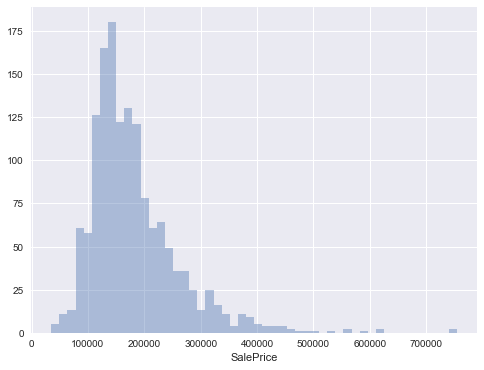

In [17]:
sns.set(rc={"figure.figsize": (8,6)})
sns.distplot(y,hist=True, kde=False, bins=50);

## Visualize Continuous features (exclude the ID) 

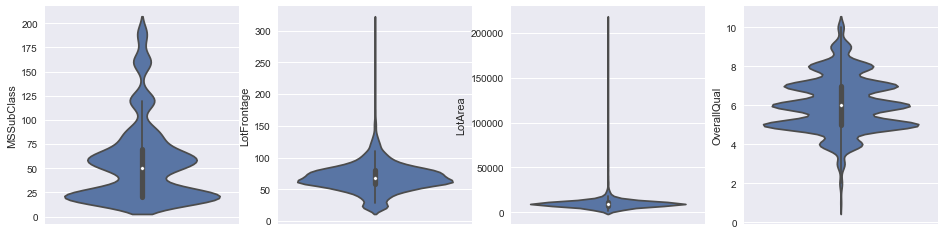

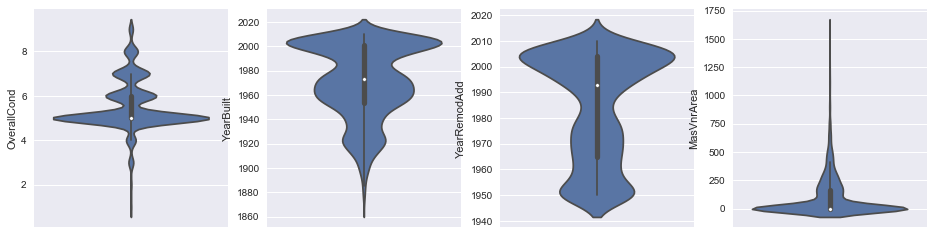

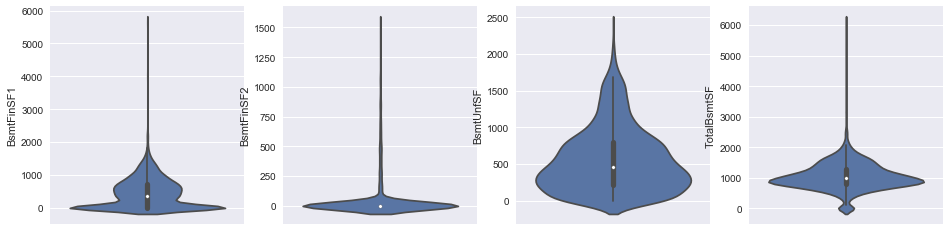

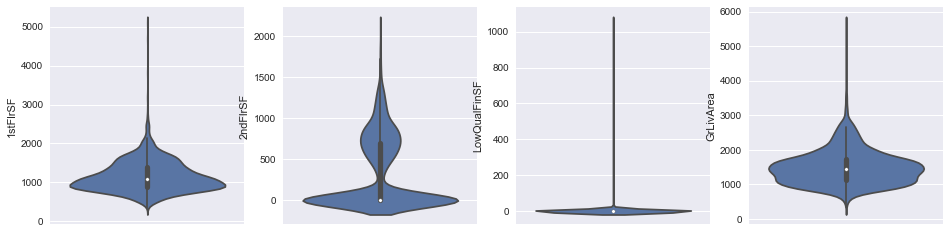

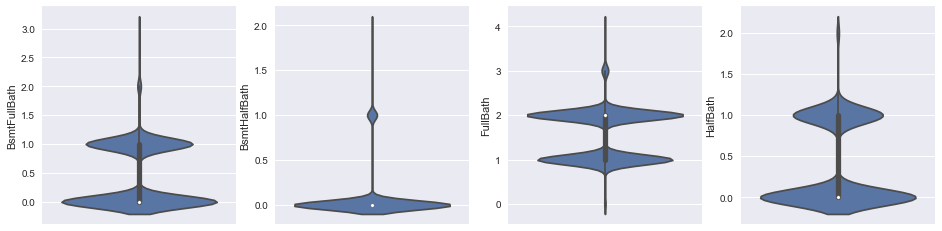

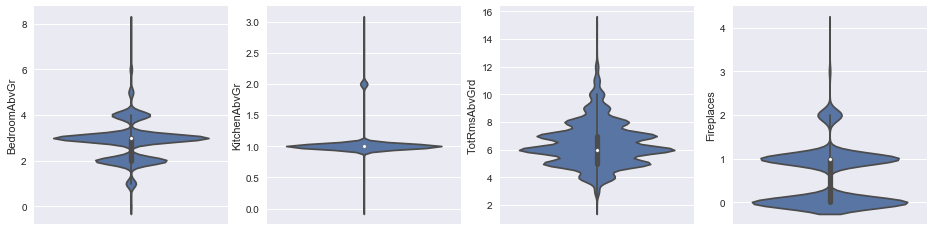

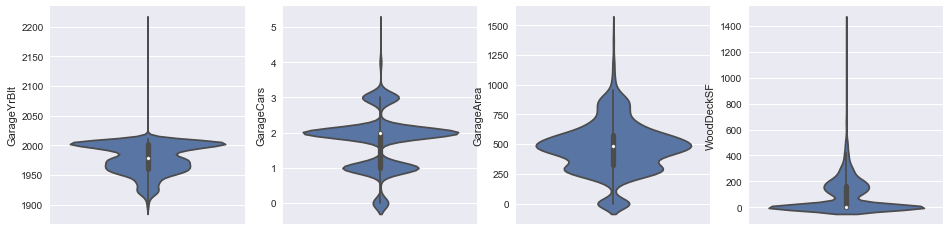

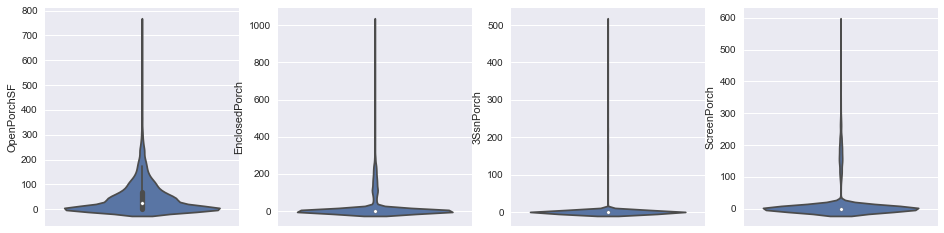

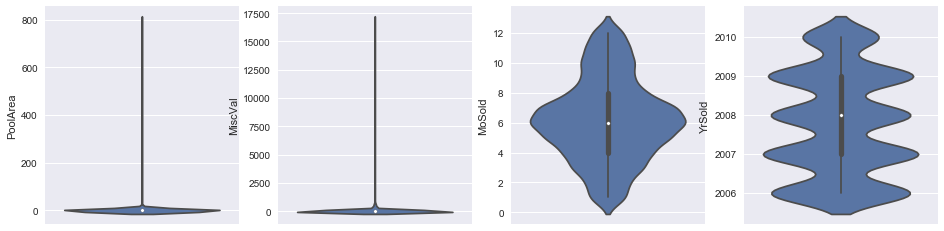

In [18]:
numeric_cols = []

for col, col_data in data.iteritems():
    if col_data.dtype != object and col!='Id':
        numeric_cols.append(col)
        
n_cols = 4
n_rows = 9
idx = 0
for i in range(n_rows):
    fg, ax = plt.subplots(nrows=1, ncols = n_cols, figsize=(16,4))
    for j in range(n_cols):
        sns.violinplot(y=data[numeric_cols[idx]], ax=ax[j])
        idx += 1
        if idx >= 36:
            break

**Highly skewed features: **

    - LotArea
    - BsmtFinSF2
    - LowQualFinSF
    - 3SsnPorch
    - PoolArea
    - MiscVal

In [19]:
from scipy.stats import skew
skew(data['LotArea'])

12.822431401556724

## Visualize Categorical features

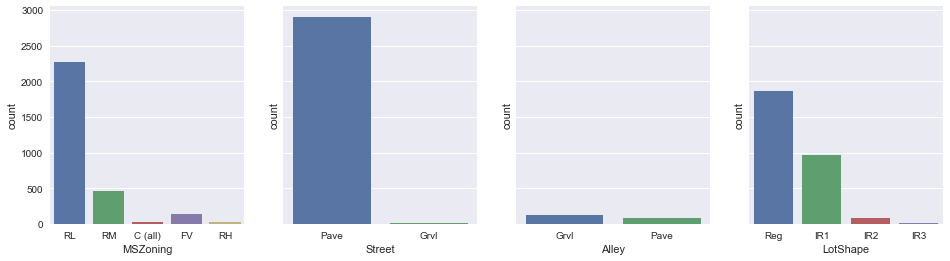

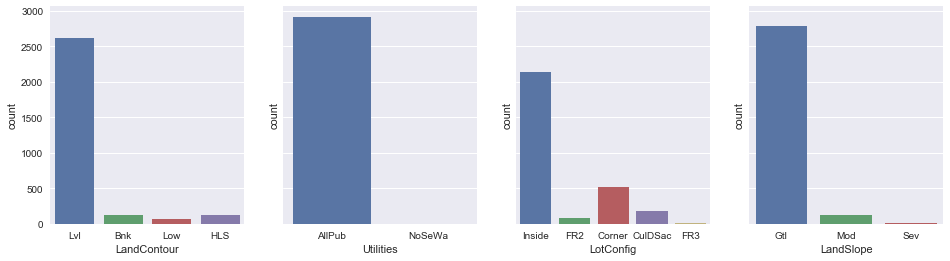

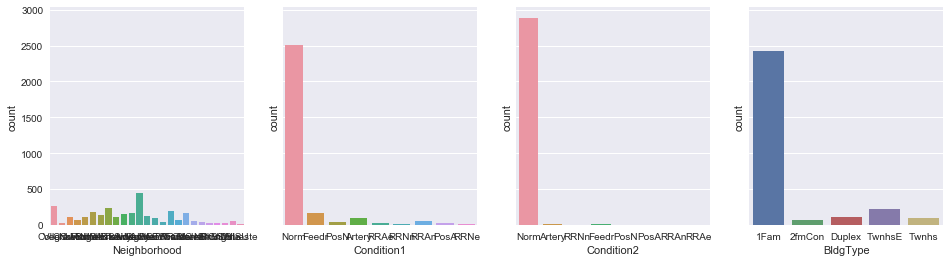

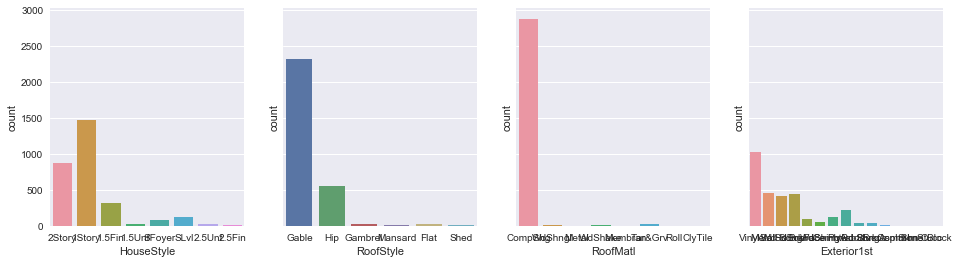

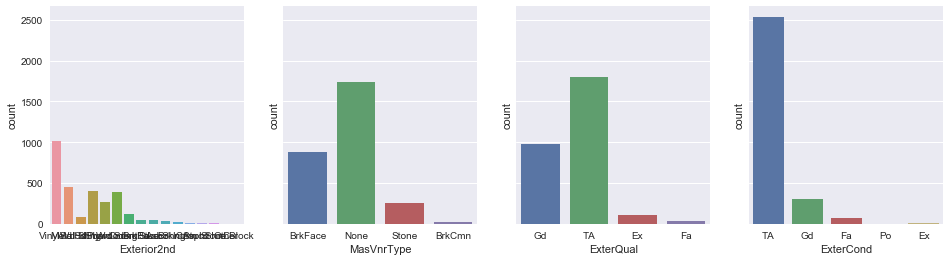

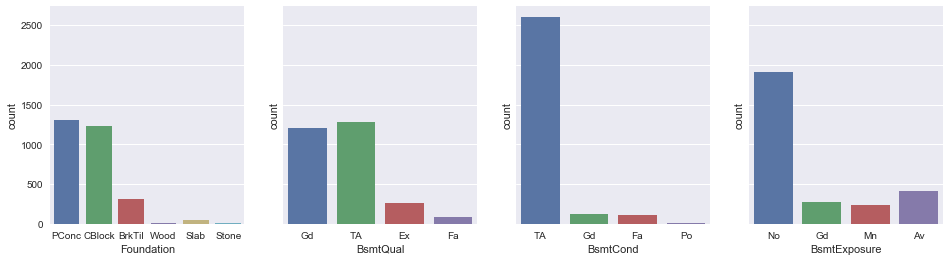

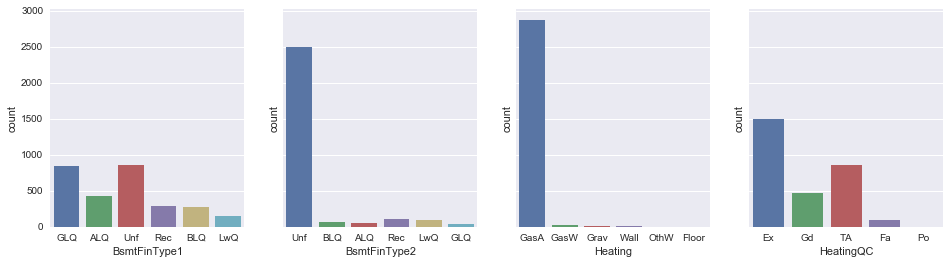

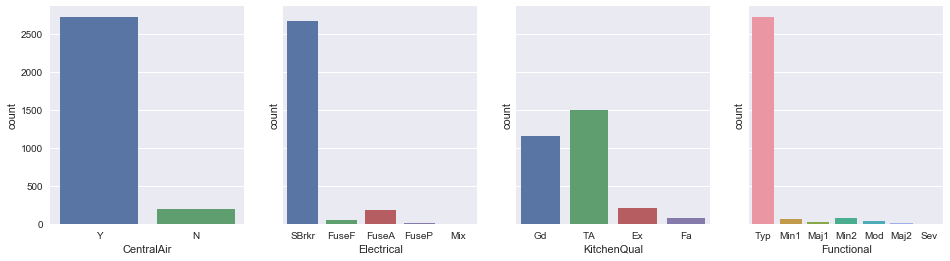

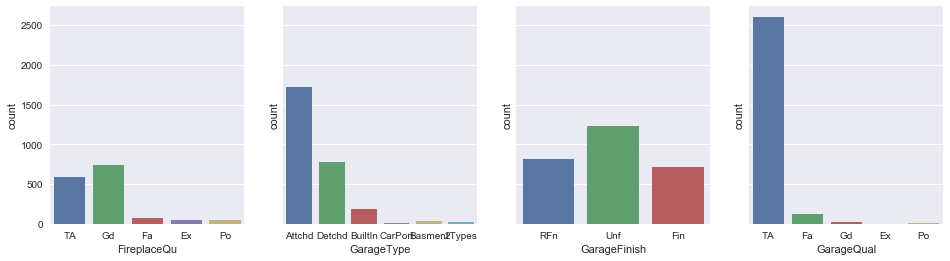

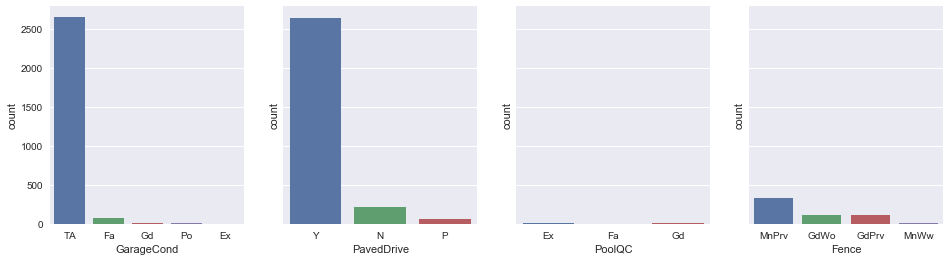

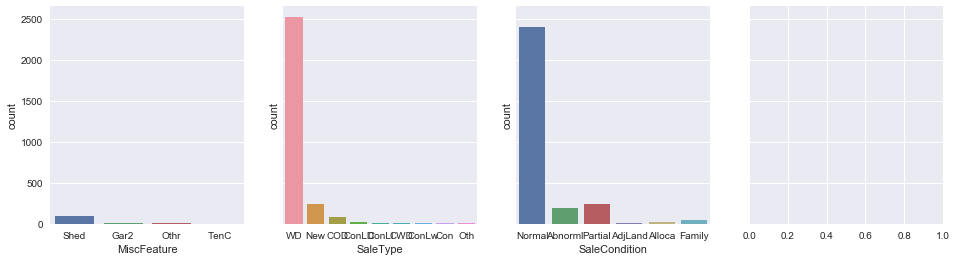

In [20]:
n_cols = 4
n_rows = 11
idx = 0
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(16, 4))
    for j in range(n_cols):
        sns.countplot(x=data[categorical_cols[idx]], ax=ax[j])
        idx += 1
        if idx >= 43:
            break

**Lack of Variation**

- Street
- Utilities

In [21]:
data[data['Street']=='Grvl']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
52,53,90,RM,110.0,8472,Grvl,NaN,IR2,Bnk,AllPub,Corner,Mod,IDOTRR,RRNn,Norm,Duplex,1Story,5,5,1963,1963,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,TA,CBlock,Gd,TA,Gd,LwQ,104.0,GLQ,712.0,0.0,816.0,GasA,TA,N,SBrkr,816,0,0,816,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,CarPort,1963.0,Unf,2.0,516.0,TA,TA,Y,106,0,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965,1965,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,1249.0,BLQ,147.0,103.0,1499.0,GasA,Ex,Y,SBrkr,1619,167,0,1786,2.0,0.0,2,0,3,1,TA,7,Typ,2,Gd,Attchd,1965.0,Fin,2.0,529.0,TA,TA,Y,670,0,0,0,0,0,NaN,NaN,Shed,700,8,2008,WD,Normal
582,583,90,RL,81.0,11841,Grvl,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,SFoyer,6,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,BrkFace,104.0,TA,Gd,CBlock,Gd,TA,Av,GLQ,816.0,Unf,0.0,0.0,816.0,GasA,TA,Y,SBrkr,816,0,0,816,1.0,0.0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,32,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
812,813,20,C (all),66.0,8712,Grvl,NaN,Reg,Bnk,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,5,5,1952,1952,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,TA,CBlock,TA,TA,Av,Unf,0.0,Unf,0.0,540.0,540.0,GasA,TA,N,FuseA,1044,0,0,1044,0.0,0.0,1,0,2,1,Fa,4,Typ,0,NaN,Basment,1952.0,Unf,2.0,504.0,TA,TA,N,0,0,0,0,0,0,NaN,NaN,Shed,54,6,2010,WD,Alloca
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,4,1935,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,Fa,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,894.0,894.0,GasA,TA,Y,SBrkr,894,0,0,894,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1994.0,RFn,3.0,1248.0,TA,TA,Y,0,20,0,0,0,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal
1184,1185,20,RL,50.0,35133,Grvl,NaN,Reg,Lvl,AllPub,Inside,Mod,Timber,Norm,Norm,1Fam,1Story,5,4,1963,1963,Hip,CompShg,MetalSd,MetalSd,BrkFace,226.0,TA,TA,CBlock,TA,TA,Gd,Rec,1159.0,Unf,0.0,413.0,1572.0,GasA,Gd,Y,SBrkr,1572,0,0,1572,1.0,0.0,1,1,3,1,TA,5,Typ,2,TA,2Types,1963.0,RFn,3.0,995.0,TA,TA,Y,0,263,0,0,263,0,NaN,NaN,NaN,0,5,2007,WD,Normal
1602,1603,30,C (all),66.0,8712,Grvl,NaN,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,7,1896,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,756.0,756.0,GasA,Gd,Y,SBrkr,952,0,0,952,0.0,0.0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1896.0,RFn,1.0,330.0,TA,TA,N,0,0,265,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Alloca
1915,1916,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,NaN,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal
2128,2129,30,RM,NaN,6291,Grvl,NaN,IR1,Lvl,AllPub,Inside,Gtl,IDOTRR,RRNe,Norm,1Fam,1Story,6,6,1930,1950,Gable,CompShg,Stucco,Wd Shng,None,0.0,Gd,Gd,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,768.0,768.0,GasA,TA,Y,SBrkr,768,0,0,768,0.0,0.0,1,0,1,1,TA,4,Typ,0,NaN,Detchd,1930.0,Unf,2.0,440.0,TA,TA,N,0,0,84,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
2219,2220,70,C (all),60.0,9000,Grvl,NaN,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,4,6,1920,1950,

In [22]:
data[data['Utilities']=='NoSeWa']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
944,945,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,NoSeWa,CulDSac,Gtl,Timber,Norm,Norm,1Fam,SLvl,6,6,1958,1958,Gable,CompShg,HdBoard,HdBoard,BrkFace,541.0,TA,TA,CBlock,TA,TA,No,GLQ,111.0,Rec,354.0,354.0,819.0,GasA,Gd,Y,FuseA,1344,0,0,1344,0.0,1.0,1,0,3,1,Gd,7,Typ,1,Gd,Basment,1958.0,RFn,2.0,525.0,TA,TA,Y,0,118,0,0,233,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml


## Scatter plot of target and predict continuous variables

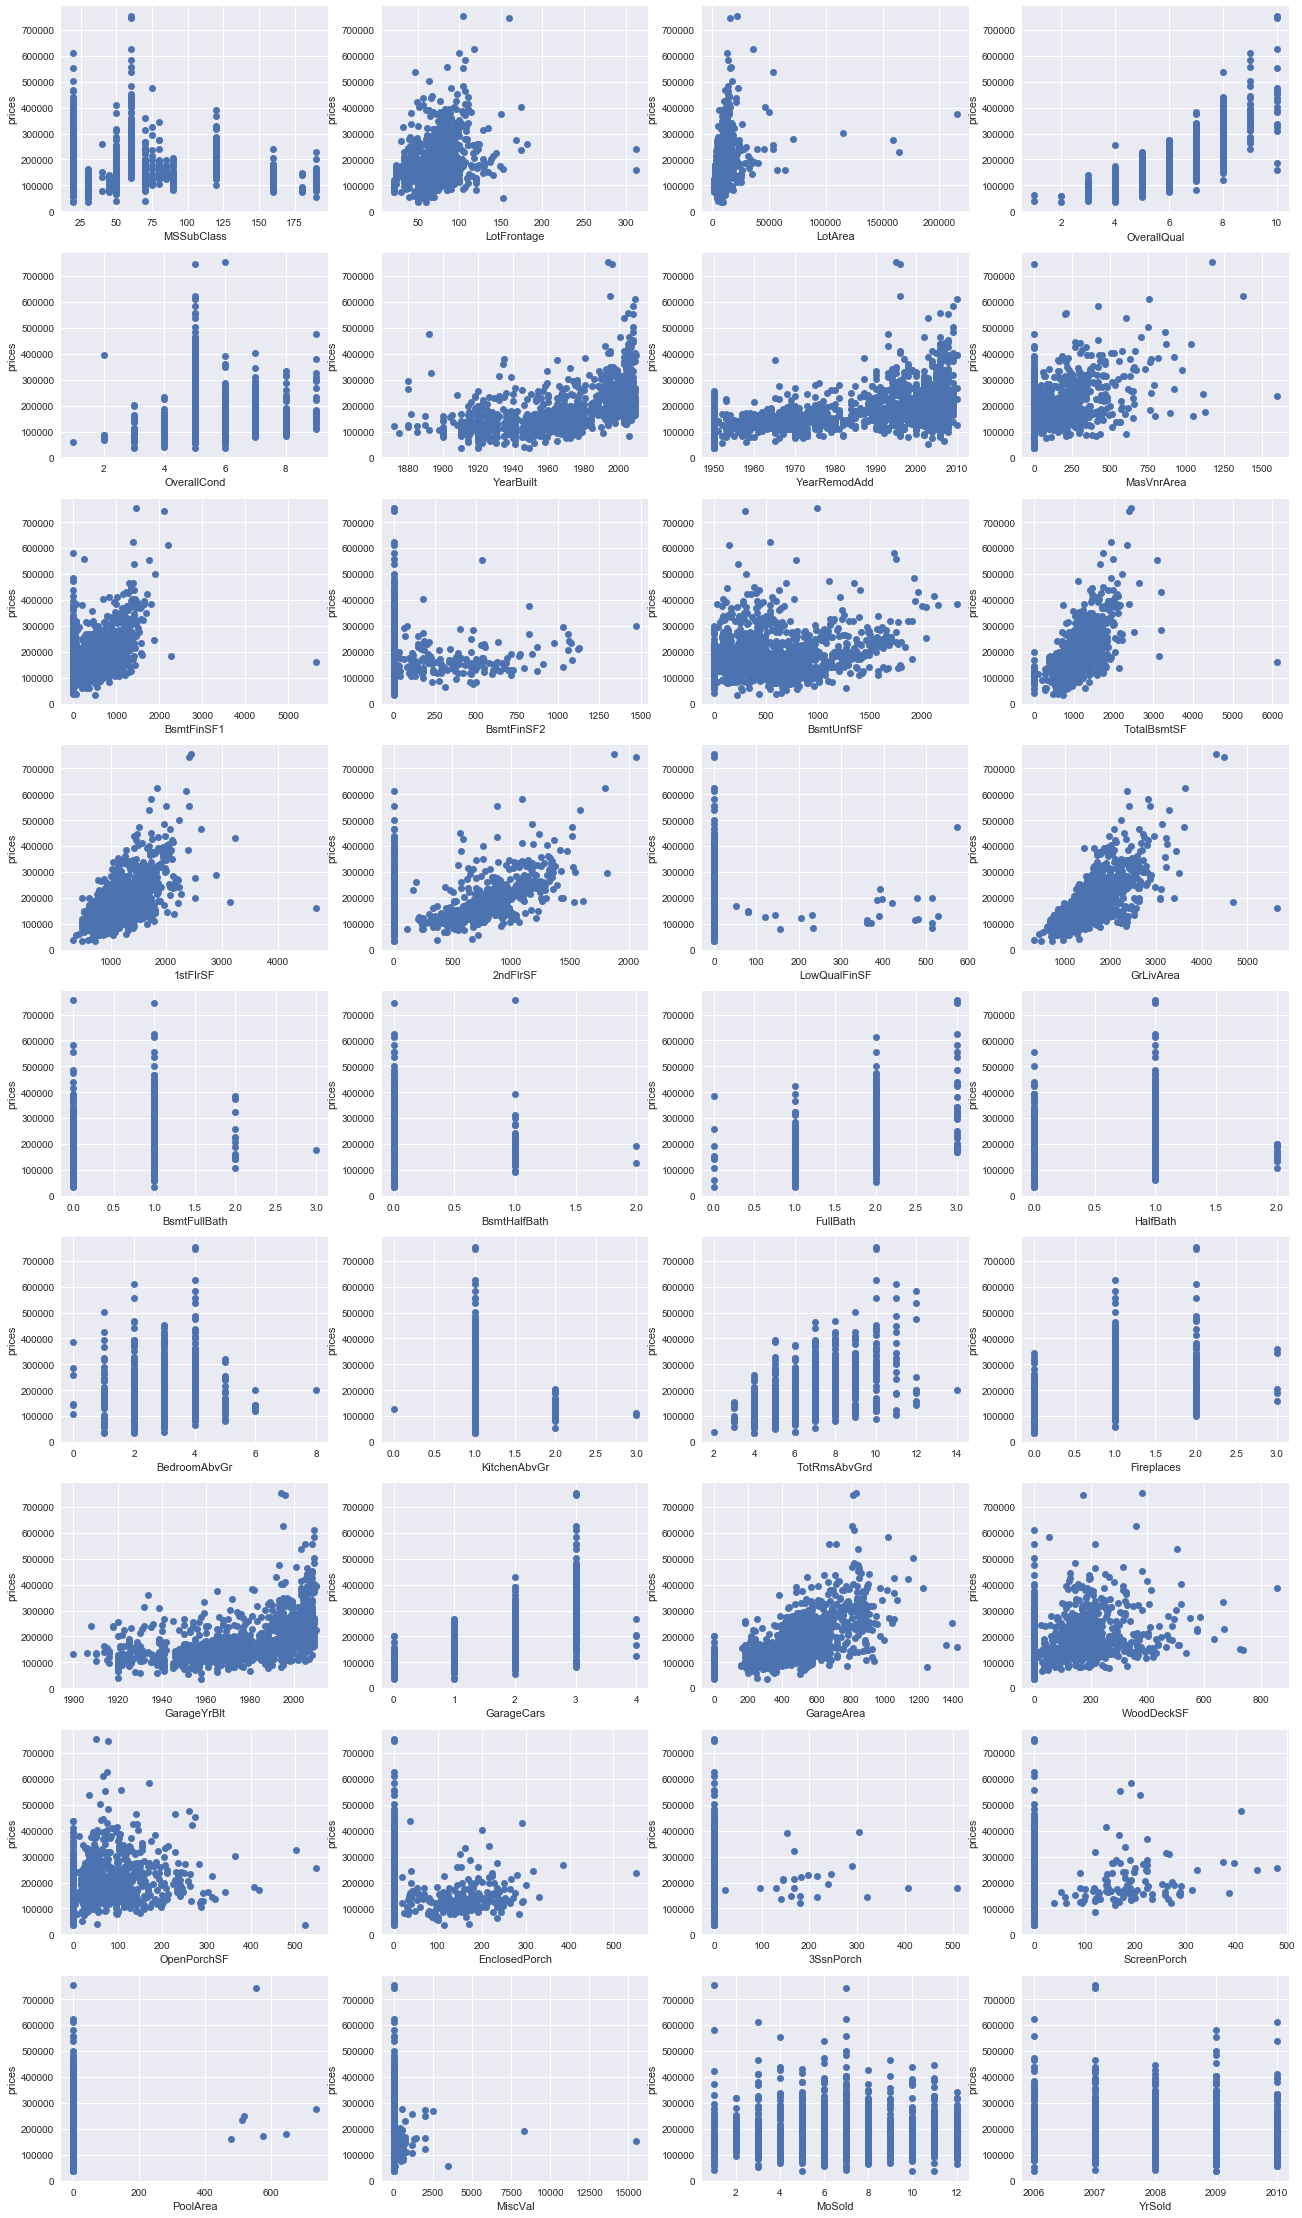

In [23]:
fig = plt.figure(figsize=(22, 40))

for i, col in enumerate(numeric_cols):
    if col != 'SalePrice':
        plt.subplot(9, 4, i + 1)  

        plt.plot(train[col], y, 'o')
        plt.xlabel(col)
        plt.ylabel('prices')

**Highly correlated variables with prices**

- OverallQual
- TotalBsmtSF
- 1stFlrSF
- GrLiveArea    

One point seems an outlier for TotalBsmtSF, 1stFlrSF, GrLiveArea

In [24]:
train[train['TotalBsmtSF'] > 6000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


## Check the feature correlation more than 0.8 or less than -0.8

In [25]:
train_corr = train.iloc[:,1:-1].corr()
train_corr.shape[0]
for i in range(train_corr.shape[0]-1, 0, -1):
    for j in range(0, train_corr.shape[0]):
        if i < j and (train_corr.iloc[i,j] >= 0.8  or train_corr.iloc[i,j] <= -0.8):
            print("The correlation between {} and {} is {}".format(train.columns[i], \
                                train.columns[j], round(train_corr.iloc[i,j],2)) )       

The correlation between MasVnrType and MasVnrArea is 0.88
The correlation between BldgType and RoofMatl is 0.83
The correlation between LandSlope and Neighborhood is 0.82
The correlation between Street and Exterior2nd is 0.83


```python
idx_del = []

for idx in data.index:
    if data.iloc[idx][miss_less_4.index].isnull().any():
        idx_del.append(idx)
        
idx_del  
data.iloc[idx_del,]
```

# Split data

In [26]:
# filter TotalBsmtSF >= 6000

train = train[train['TotalBsmtSF'] < 6000]
y = train.iloc[:,80] 
print(y.size)
train= train.iloc[:, :80]
train_X = train.drop(['Utilities', 'Id', 'Street','LandSlope', 'BldgType', 'MasVnrType' ], axis=1)
train_X.shape

1459


(1459, 74)

In [27]:
# testhttp://localhost:8888/notebooks/ml_sandbox/houseprice/predict_lr.ipynb#
ID = test['Id']
test = test.drop(['Utilities', 'Id','Street','LandSlope', 'BldgType', 'MasVnrType'], axis=1)
test.shape

(1459, 74)

In [44]:
print(numeric_cols)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [28]:
print(len(numeric_cols))
train_X[numeric_cols] = train_X[numeric_cols].fillna(train_X.mode())
print(train_X.shape)
test[numeric_cols] = test[numeric_cols].fillna(train_X.mode())
print(test.shape)

36
(1459, 74)
(1459, 74)


## Impute missing value in categorical variable as 'unknown'

In [29]:
for col, col_data in train_X.iteritems():
    if col in categorical_cols: 
        col_data = col_data.fillna('unknown', inplace=True)
        
for col, col_data in test.iteritems():
    if col in categorical_cols: 
        col_data = col_data.fillna('unknown', inplace=True)        

### Since the target variable is skewed, we will transform the data using numpy log1p.

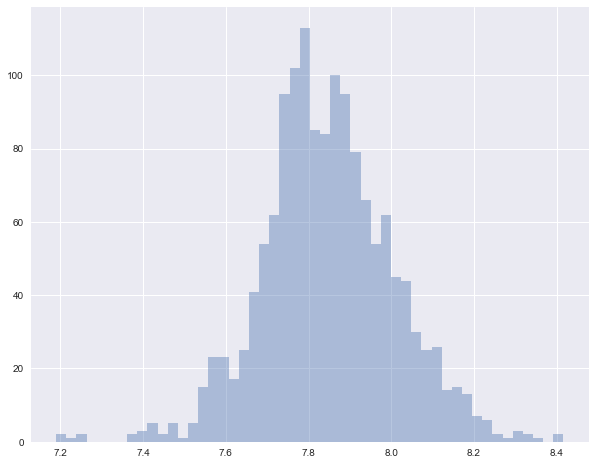

In [30]:
from scipy.stats import boxcox

train_y, lambda_ = boxcox(y)

sns.set(rc={"figure.figsize": (10, 8)})
sns.distplot(train_y,hist=True, kde=False, bins=50)

## Convert Categorical variables to dummy variables - One Hot Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

categorical_cols.remove('Utilities')
categorical_cols.remove('Street')
categorical_cols.remove('LandSlope')
categorical_cols.remove('BldgType')
categorical_cols.remove('MasVnrType' )

dummy_train = []
dummy_test = []
labels = []
for idx, col in enumerate(categorical_cols):
    
    labels = list(set(train_X[col].unique()) | set(test[col].unique()))
    
    # label encode
    label_encoder = LabelEncoder()
    label_encoder.fit(labels)
    feature_train = label_encoder.transform(train_X[col])
    feature_train = feature_train.reshape(train_X.shape[0],1)
    
    feature_test = label_encoder.transform(test[col])
    feature_test = feature_test.reshape(test.shape[0],1)
    
    # one hot encode
    onehot_encoder = OneHotEncoder(sparse=False, n_values=len(labels))
    feature_train = onehot_encoder.fit_transform(feature_train)
    dummy_train.append(feature_train)
    
    feature_test = onehot_encoder.fit_transform(feature_test)
    dummy_test.append(feature_test)
    
# Make a 2D array from a list of 1D arrays
encode_train = np.column_stack(dummy_train)
encode_test = np.column_stack(dummy_test)

print(encode_train.shape)
print(encode_test.shape)

(1459L, 256L)
(1459L, 256L)


# Test Algorithms

In [32]:
from sklearn.metrics import mean_absolute_error  # I use this metrics because I don't want put more weight on big error
from sklearn.metrics import r2_score 

In [33]:
# Linear Regressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# non linear regressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# ensemble regressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# other regressor
#from xgboost import XGBRegressor

In [34]:
X_train = encode_train
Y_train = train_y

## 1. Tree basee

In [35]:
# Bagging Regressor
model = BaggingRegressor()
model.fit(X_train, Y_train)

mae = mean_absolute_error(y, np.power((model.predict(X_train) * lambda_) + 1, 1/lambda_))
print(mae)

# Random Forest Regressor
model = RandomForestRegressor()
model.fit(X_train, Y_train)

mae = mean_absolute_error(y, np.power((model.predict(X_train) * lambda_) + 1, 1/lambda_))
print(mae)

# ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X_train, Y_train)

mae = mean_absolute_error(y, np.power((model.predict(X_train) * lambda_) + 1, 1/lambda_))
print(mae)

# AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(X_train, Y_train)

mae = mean_absolute_error(y, np.power((model.predict(X_train) * lambda_) + 1, 1/lambda_))
print(mae)

# GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, Y_train)

mae = mean_absolute_error(y, np.power((model.predict(X_train) * lambda_) + 1, 1/lambda_))
print(mae)

10424.9672159
10284.0286386
222.583638614
29166.9451524
20576.2726433


## Random Forest Regressor


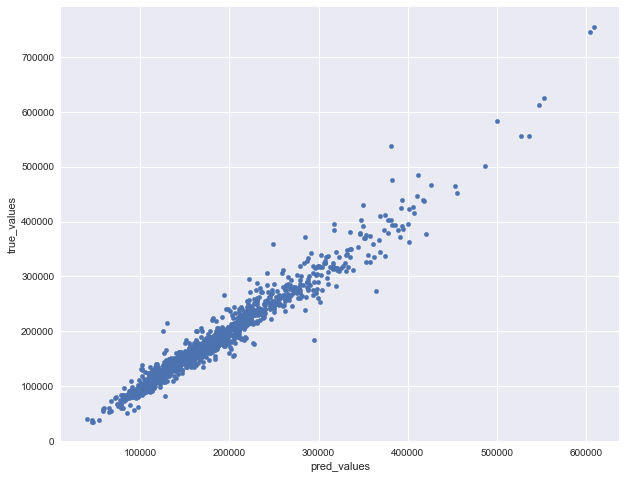

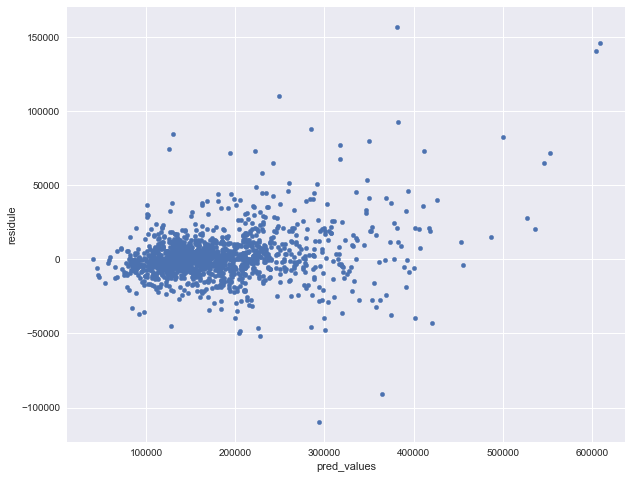

In [36]:
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

inv_pred = np.power((rf.predict(X_train) * lambda_) + 1, 1/lambda_)

rf_result = pd.DataFrame({"pred_values": inv_pred, "true_values": y,
"residule" : (y - inv_pred)})
rf_result.plot(x="pred_values", y = "true_values", kind = 'scatter')
rf_result.plot(x="pred_values", y = "residule", kind = 'scatter')


In [37]:
## predict the test

X_test = encode_train
inv_pred = np.power((rf.predict(X_test) * lambda_) + 1, 1/lambda_)
rf_pred = pd.DataFrame({'Id':ID, 'SalePrice':inv_pred })
rf_pred.to_csv('sample_submission_rf_boxcox.csv')

## Linear Regressor

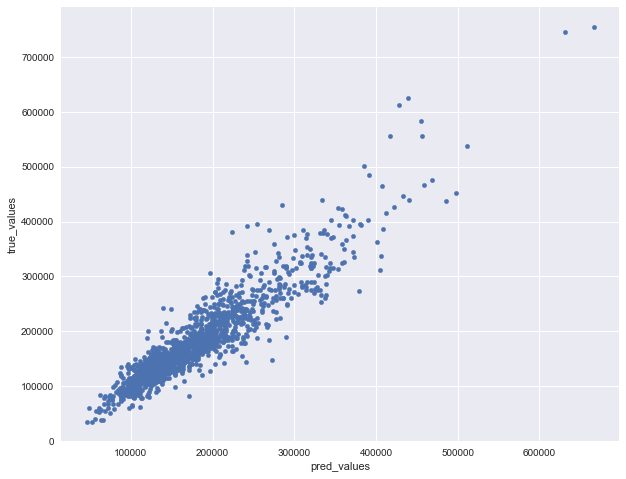

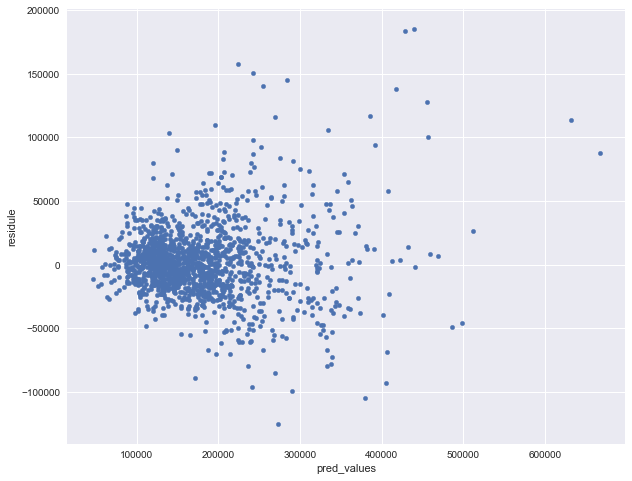

In [38]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

inv_pred = np.power((lr.predict(X_train) * lambda_) + 1, 1/lambda_)

lr_result = pd.DataFrame({"pred_values":inv_pred, "true_values":y,
"residule" : (y - inv_pred)})
lr_result.plot(x="pred_values", y = "true_values", kind = 'scatter')
lr_result.plot(x="pred_values", y = "residule", kind = 'scatter')

In [39]:
X_test = encode_train

inv_pred = np.power((lr.predict(X_test) * lambda_) + 1, 1/lambda_)

lr_pred = pd.DataFrame({'Id':ID, 'SalePrice':inv_pred })
lr_pred
lr_pred.to_csv('sample_submission_lr_boxcox.csv')

## AdaBoost Regressor

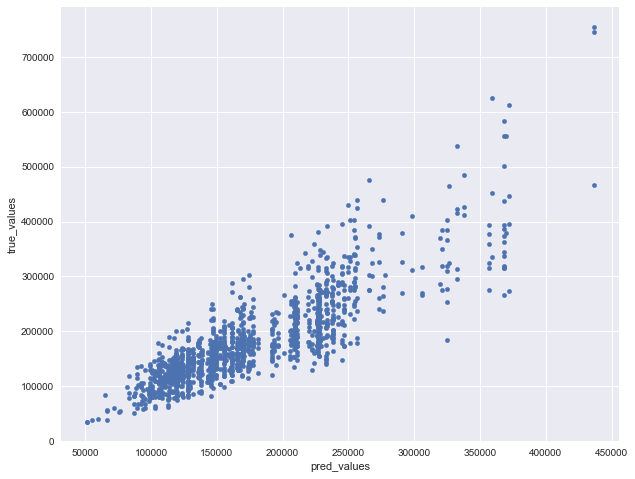

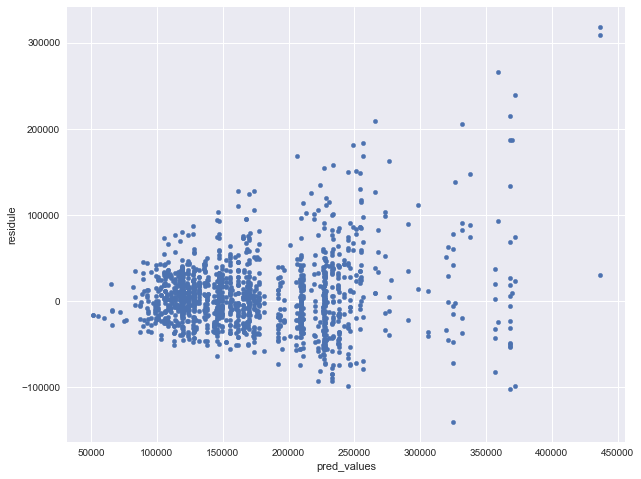

In [40]:
# AdaBoost Regressor
ad = AdaBoostRegressor()
ad.fit(X_train, Y_train)
inv_pred = np.power((ad.predict(X_train) * lambda_) + 1, 1/lambda_)

ad_result = pd.DataFrame({"pred_values":inv_pred, "true_values":y,
"residule" : (y - inv_pred)})
ad_result.plot(x="pred_values", y = "true_values", kind = 'scatter')
ad_result.plot(x="pred_values", y = "residule", kind = 'scatter')

In [41]:
X_test = encode_train

inv_pred = np.power((ad.predict(X_test) * lambda_) + 1, 1/lambda_)

ad_pred = pd.DataFrame({'Id':ID, 'SalePrice':inv_pred })
ad_pred
ad_pred.to_csv('sample_submission_ad_boxcox.csv',index=False)

In [42]:
# box cox 
from scipy import stats
y = np.array([  10000.,  290000.,  430000.,  210000.])
bc_y, lam = stats.boxcox(y)

# inverse box cox function
in_y = np.power((bc_y * lam)+1, 1/lam)
in_y

array([  10000.,  290000.,  430000.,  210000.])

In [43]:
print(lam)

0.690998531572
